<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2022/blob/main/notebooks/4_porzadkowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
powiaty = pd.read_excel("Powiaty.xls")
powiaty.head()

,Powiaty,Id,X1_s,X2_s,X3_d,X4_d,X5_d,X6_d
0,chodzieski,251,0.638029,1648.80,0.231,0.282360,0.536464,0.064824
1,czarnkowsko-trzcianecki,252,0.635018,1800.35,0.248,0.295556,0.512332,0.115621
2,gnieźnieński,253,0.571948,1801.16,0.232,0.308769,0.468553,0.246254
3,gostyński,254,0.707542,1815.27,0.194,0.362074,0.470871,0.077338
4,grodziski,255,0.645110,1710.91,0.121,0.412271,0.417134,0.141414


Dokonujemy normalizacji metodą unitaryzacji zerowanej.

In [8]:
powiaty["z1"] = (powiaty.X1_s - np.min(powiaty.X1_s)) / (np.max(powiaty.X1_s) - np.min(powiaty.X1_s))
powiaty["z2"] = (powiaty.X2_s - np.min(powiaty.X2_s)) / (np.max(powiaty.X2_s) - np.min(powiaty.X2_s))
powiaty["z3"] = (np.max(powiaty.X3_d) - powiaty.X3_d ) / (np.max(powiaty.X3_d) - np.min(powiaty.X3_d))
powiaty["z4"] = (np.max(powiaty.X4_d) - powiaty.X4_d ) / (np.max(powiaty.X4_d) - np.min(powiaty.X4_d))
powiaty["z5"] = (np.max(powiaty.X5_d) - powiaty.X5_d ) / (np.max(powiaty.X5_d) - np.min(powiaty.X5_d))
powiaty["z6"] = (np.max(powiaty.X6_d) - powiaty.X6_d ) / (np.max(powiaty.X6_d) - np.min(powiaty.X6_d))
powiaty.loc[:, "z1":"z6"].describe()

,z1,z2,z3,z4,z5,z6
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.664574,0.409495,0.467755,0.465635,0.494289,0.809949
std,0.174233,0.212612,0.230894,0.234979,0.232728,0.203337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602556,0.268325,0.271429,0.271943,0.332606,0.777517
50%,0.671521,0.380412,0.461905,0.449770,0.519235,0.860363
75%,0.729207,0.512172,0.650000,0.621935,0.654467,0.945407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Wyznaczamy miernik syntetyczny metodą bezwzorcową

$$
\bar{q}_i = \frac{\sum_i^k z_{ik}}{k}
$$

In [12]:
powiaty["miernik"] = powiaty.loc[:, "z1":"z6"].mean(axis = 1) ## srednia po kolumnach dla kazdego wiersza
powiaty.head()

,Powiaty,Id,X1_s,X2_s,X3_d,X4_d,X5_d,X6_d,z1,z2,z3,z4,z5,z6,miernik
0,chodzieski,251,0.638029,1648.80,0.231,0.282360,0.536464,0.064824,0.706672,0.253130,0.228571,0.766913,0.261067,1.000000,0.536059
1,czarnkowsko-trzcianecki,252,0.635018,1800.35,0.248,0.295556,0.512332,0.115621,0.701631,0.384236,0.147619,0.689012,0.356047,0.881383,0.526655
2,gnieźnieński,253,0.571948,1801.16,0.232,0.308769,0.468553,0.246254,0.596050,0.384937,0.223810,0.611014,0.528359,0.576335,0.486751
3,gostyński,254,0.707542,1815.27,0.194,0.362074,0.470871,0.077338,0.823039,0.397143,0.404762,0.296332,0.519235,0.970780,0.568549
4,grodziski,255,0.645110,1710.91,0.121,0.412271,0.417134,0.141414,0.718526,0.306861,0.752381,0.000000,0.730738,0.821152,0.554943


In [13]:
powiaty.sort_values(by = "miernik", ascending=False, inplace=True)
powiaty[["Powiaty", "miernik"]]

,Powiaty,miernik
34,Poznań,0.867575
20,poznański,0.796835
33,Leszno,0.691035
31,Kalisz,0.643147
23,szamotulski,0.629432
28,wolsztyński,0.625491
12,leszczyński,0.625481
17,ostrzeszowski,0.618537
10,kościański,0.612419
24,średzki,0.601480


Wyznaczamy wskaźnik metodą wzorcową zakładając, że wartości maksymalne naszych zmiennych znormalizowanych są wzorcem.

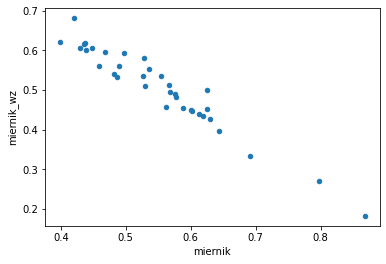

In [29]:
mier_wzorcowy = powiaty.loc[:, "z1":"z6"] - powiaty.loc[:, "z1":"z6"].max(axis = 0)
powiaty["miernik_wz"] = np.sqrt(np.mean(mier_wzorcowy**2, axis = 1))

powiaty.plot.scatter(x = "miernik", y = "miernik_wz")